In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import statsmodels
import statsmodels.api as sm
from statsmodels.api import add_constant
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import linear_model

### Reading, Understanding and Visualising the Data

In [483]:
#Loading Dataframe
bikedata=pd.read_csv("day.csv")
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Exploring the Data

In [484]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [485]:
#shape of dataframe
bikedata.shape

(730, 16)

In [486]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [487]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Checking for missing / Null values in Columns

In [488]:
#checking for null values in individual columns
col=bikedata.columns
for i in range(len(col)):
    print('NA Values in column ', '{}'.format(col[i]) + ' is:' , '{}'.format(sum(bikedata.iloc[:,i].isna())) )

NA Values in column  instant is: 0
NA Values in column  dteday is: 0
NA Values in column  season is: 0
NA Values in column  yr is: 0
NA Values in column  mnth is: 0
NA Values in column  holiday is: 0
NA Values in column  weekday is: 0
NA Values in column  workingday is: 0
NA Values in column  weathersit is: 0
NA Values in column  temp is: 0
NA Values in column  atemp is: 0
NA Values in column  hum is: 0
NA Values in column  windspeed is: 0
NA Values in column  casual is: 0
NA Values in column  registered is: 0
NA Values in column  cnt is: 0


- since there are no null values in the columns, there is no necessity for imputing or deleting any rows of the data

In [489]:
#Converting Date string column to date format
bikedata['dteday']=pd.to_datetime(bikedata['dteday'],format='%d-%m-%Y')

#### Converting 'season', 'weekday', 'weathersit', 'month' columns to categorical type

In [490]:
#replacing the numbers in season column with words 'spring','summer','fall','winter'
bikedata['season']=bikedata.season.replace([1,2,3,4],value=['spring','summer','fall','winter'])
bikedata.head()

#replacing the numbers in weekday column with words 'sunday','monday','tuesday','wednesday', 'thursday', 'friday', 'saturday'
bikedata['weekday']=bikedata.weekday.replace([1,2,3,4,5,6,0],value=['monday','tuesday','wednesday','thursday','friday','saturday','sunday'])

#replacing the numbers in weathersit column with words 'Clear','Cloudy','Light Rain or Snow','Heavy Rain or Snow'
bikedata['weathersit']=bikedata.weathersit.replace([1,2,3,4],value=['Clear','Cloudy','Light Rain or Snow','Heavy Rain or Snow'])

#replacing the numbers in yr column with 2018 or 2019
bikedata['yr']=bikedata.yr.replace([0,1],value=['2018', '2019'])

#replacing the numbers in mnth column with words 'january', 'february', 'march', 'april', 'may', 'june', 'july'
# 'august','september','october','november','december'
bikedata['mnth']=bikedata.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],value=['january','february','march','april','may','june','july','august','september','october','november','december'])

#replacing the numbers in holiday column with yes or no
bikedata['holiday']=bikedata.holiday.replace([0,1],value=['no', 'yes'])

#replacing the numbers in workingday column with yes or no
bikedata['workingday']=bikedata.workingday.replace([0,1],value=['no', 'yes'])

In [491]:
bikedata.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,january,no,monday,yes,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,january,no,tuesday,yes,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,january,no,wednesday,yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,january,no,thursday,yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,january,no,friday,yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-01-06,spring,2018,january,no,saturday,no,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-01-07,spring,2018,january,no,sunday,no,Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-01-08,spring,2018,january,no,monday,yes,Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-01-09,spring,2018,january,no,tuesday,yes,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-01-10,spring,2018,january,no,wednesday,yes,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [492]:
#rounding off values of float 64 columns
bikedata.iloc[:,9:13]=round(bikedata.iloc[:,9:13],2)

In [493]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,january,no,monday,yes,Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-01-02,spring,2018,january,no,tuesday,yes,Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-01-03,spring,2018,january,no,wednesday,yes,Clear,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-01-04,spring,2018,january,no,thursday,yes,Clear,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-01-05,spring,2018,january,no,friday,yes,Clear,9.31,11.46,43.70,12.52,82,1518,1600


#### Deleting Unnecessary Columns

In [494]:
# 'instant' column is acting like an index, thus deleting it won't be affecting our data analysis
bikedata.drop(['instant'],axis=1,inplace=True)

In [495]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

#### Checking for Outliers in 'temperature', 'apparent temperature', 'humidity', 'windspeed'

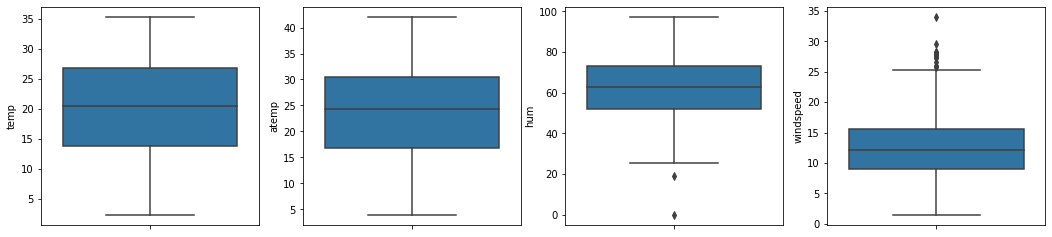

In [496]:
col=bikedata.columns[8:12]
plt.figure(figsize=(18,4))
i=1
for c in col:
    plt.subplot(1,4,i)
    sns.boxplot(y=c, data=bikedata)
    i=i+1

- There are no outliers present in temperature, apparent temperature column. Thus there is no need for imputation or deletion.

In [497]:
bikedata.windspeed.describe()

count    730.000000
mean      12.763699
std        5.195640
min        1.500000
25%        9.040000
50%       12.130000
75%       15.627500
max       34.000000
Name: windspeed, dtype: float64

In [498]:
bikedata.windspeed

0      10.75
1      16.65
2      16.64
3      10.74
4      12.52
       ...  
725    23.46
726    10.42
727     8.33
728    23.50
729    10.37
Name: windspeed, Length: 730, dtype: float64

count    694.000000
mean      12.109827
std        4.407782
min        1.500000
25%        8.920000
50%       11.730000
75%       15.160000
max       23.000000
Name: windspeed, dtype: float64

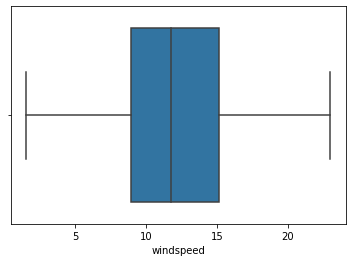

In [499]:
sns.boxplot(bikedata.windspeed[bikedata.windspeed<=bikedata.windspeed.quantile(q=0.95)])
len(bikedata.windspeed[bikedata.windspeed<=bikedata.windspeed.quantile(q=0.95)])
bikedata.windspeed[bikedata.windspeed<=bikedata.windspeed.quantile(q=0.95)].describe()

- since removing outliers are not effecting statistics of windspeed column significantly, there is no need to impute
<br> or delete the outliers present in the column.

In [500]:
bikedata.hum.describe()

count    730.000000
mean      62.765082
std       14.237634
min        0.000000
25%       52.000000
50%       62.625000
75%       72.990000
max       97.250000
Name: hum, dtype: float64

count    693.000000
mean      61.274242
std       13.008500
min        0.000000
25%       51.330000
50%       61.700000
75%       71.250000
max       86.710000
Name: hum, dtype: float64

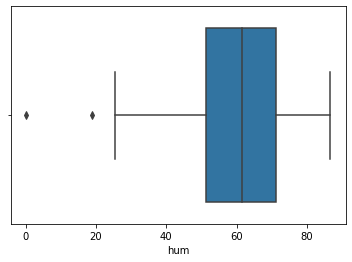

In [501]:
sns.boxplot(bikedata.hum[bikedata.hum<=bikedata.hum.quantile(q=0.95)])
len(bikedata.hum[bikedata.hum<=bikedata.hum.quantile(q=0.95)])
bikedata.hum[bikedata.hum<=bikedata.hum.quantile(q=0.95)].describe()

since removing outliers are not effecting statistics of humidity column significantly, there is no need to impute
or delete the outliers present in the column.

### Univariate Analysis

#### Categorical Variables - 'Season', 'month', 'weekday', 'weather situation'

fall      25.753425
summer    25.205479
spring    24.657534
winter    24.383562
Name: season, dtype: float64

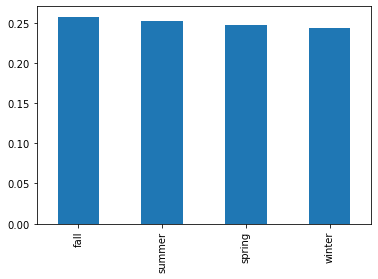

In [502]:
bikedata.season.value_counts(normalize=True).plot.bar()
bikedata.season.value_counts(normalize=True)*100

The total count of customers seems to be equal in percentage in all seasons.

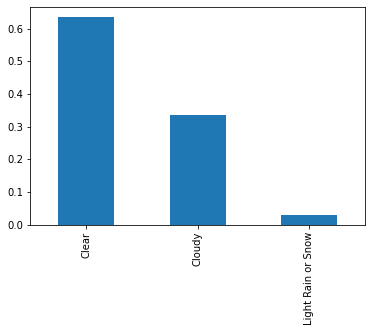

Clear                 63.424658
Cloudy                33.698630
Light Rain or Snow     2.876712
Name: weathersit, dtype: float64

In [503]:
bikedata.weathersit.value_counts(normalize=True).plot.bar()
plt.show()
bikedata.weathersit.value_counts(normalize=True)*100


We can deduce that, 63 % of the time in the data, Clear weather condition prevailed. Next to that is cloudy weather condition.
<br> There are no instances of Heavy Rain or snow.

#### Univariate Analysis - Numerical Variables ('Temperature', 'Apparent Temperature', 'Humidity')

In [504]:
bikedata.temp.describe()

count    730.000000
mean      20.319329
std        7.506827
min        2.420000
25%       13.810000
50%       20.465000
75%       26.882500
max       35.330000
Name: temp, dtype: float64

In [505]:
# Mean value of temperature of all seasons is 20.3 degree centigrade

In [506]:
s18t=bikedata.temp[bikedata.yr==2018][bikedata.season=='spring'].describe()
print('Mean temperature in the spring season in the year 2018 is:', round(s18t[1],2), 'degree centigrade')
w18t=bikedata.temp[bikedata.yr==2018][bikedata.season=='winter'].describe()
print('Mean temperature in the winter season in the year 2018 is:', round(w18t[1],2), 'degree centigrade')
su18t=bikedata.temp[bikedata.yr==2018][bikedata.season=='summer'].describe()
print('Mean temperature in the summer season in the year 2018 is:', round(su18t[1],2), 'degree centigrade')
f18t=bikedata.temp[bikedata.yr==2018][bikedata.season=='fall'].describe()
print('Mean temperature in the fall season in the year 2018 is:', round(f18t[1],2), 'degree centigrade')

Mean temperature in the spring season in the year 2018 is: nan degree centigrade
Mean temperature in the winter season in the year 2018 is: nan degree centigrade
Mean temperature in the summer season in the year 2018 is: nan degree centigrade
Mean temperature in the fall season in the year 2018 is: nan degree centigrade


In [507]:
s19t=bikedata.temp[bikedata.yr==2019][bikedata.season=='spring'].describe()
print('Mean temperature in the spring season in the year 2019 is:', round(s19t[1],2), 'degree centigrade')
w19t=bikedata.temp[bikedata.yr==2019][bikedata.season=='winter'].describe()
print('Mean temperature in the winter season in the year 2019 is:', round(w19t[1],2), 'degree centigrade')
su19t=bikedata.temp[bikedata.yr==2019][bikedata.season=='summer'].describe()
print('Mean temperature in the summer season in the year 2019 is:', round(su19t[1],2), 'degree centigrade')
f19t=bikedata.temp[bikedata.yr==2019][bikedata.season=='fall'].describe()
print('Mean temperature in the fall season in the year 2019 is:', round(f19t[1],2), 'degree centigrade')

Mean temperature in the spring season in the year 2019 is: nan degree centigrade
Mean temperature in the winter season in the year 2019 is: nan degree centigrade
Mean temperature in the summer season in the year 2019 is: nan degree centigrade
Mean temperature in the fall season in the year 2019 is: nan degree centigrade


In [508]:
bikedata.atemp.describe()

count    730.000000
mean      23.726384
std        8.150247
min        3.950000
25%       16.892500
50%       24.370000
75%       30.445000
max       42.040000
Name: atemp, dtype: float64

In [509]:
s18at=bikedata.atemp[bikedata.yr==2018][bikedata.season=='spring'].describe()
print('Mean Apparent temperature in the spring season in the year 2018 is:', round(s18at[1],2), 'degree centigrade')
w18at=bikedata.atemp[bikedata.yr==2018][bikedata.season=='winter'].describe()
print('Mean Apparent temperature in the winter season in the year 2018 is:', round(w18at[1],2), 'degree centigrade')
su18at=bikedata.atemp[bikedata.yr==2018][bikedata.season=='summer'].describe()
print('Mean Apparent temperature in the summer season in the year 2018 is:', round(su18at[1],2), 'degree centigrade')
f18at=bikedata.atemp[bikedata.yr==2018][bikedata.season=='fall'].describe()
print('Mean Apparent temperature in the fall season in the year 2018 is:', round(f18at[1],2), 'degree centigrade')

Mean Apparent temperature in the spring season in the year 2018 is: nan degree centigrade
Mean Apparent temperature in the winter season in the year 2018 is: nan degree centigrade
Mean Apparent temperature in the summer season in the year 2018 is: nan degree centigrade
Mean Apparent temperature in the fall season in the year 2018 is: nan degree centigrade


In [510]:
s19at=bikedata.atemp[bikedata.yr==2019][bikedata.season=='spring'].describe()
print('Mean Apparent temperature in the spring season in the year 2019 is:', round(s19at[1],2), 'degree centigrade')
w19at=bikedata.atemp[bikedata.yr==2019][bikedata.season=='winter'].describe()
print('Mean Apparent temperature in the winter season in the year 2019 is:', round(w19at[1],2), 'degree centigrade')
su19at=bikedata.atemp[bikedata.yr==2019][bikedata.season=='summer'].describe()
print('Mean Apparent temperature in the summer season in the year 2019 is:', round(su19at[1],2), 'degree centigrade')
f19at=bikedata.atemp[bikedata.yr==2019][bikedata.season=='fall'].describe()
print('Mean Apparent temperature in the fall season in the year 2019 is:', round(f19at[1],2), 'degree centigrade')

Mean Apparent temperature in the spring season in the year 2019 is: nan degree centigrade
Mean Apparent temperature in the winter season in the year 2019 is: nan degree centigrade
Mean Apparent temperature in the summer season in the year 2019 is: nan degree centigrade
Mean Apparent temperature in the fall season in the year 2019 is: nan degree centigrade


From the above deductions, we can say that, even though the real temperature is less, the apparent or feeling temperature is more. It might be due to combination of Humidity and windspeed factors.

#### Numerical - Numerical Analysis

#### Piechart of Casual vs Registered users

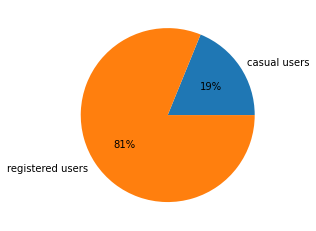

In [511]:
d=[bikedata.casual.sum(), bikedata.registered.sum()]
plt.pie(d,labels=['casual users','registered users'], autopct='%1.0f%%')
plt.show()

- We can see that 81 % of the total users are 'Registered' users and 19 % are 'Casual' users.

#### Pair Plot Analysis

In [512]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

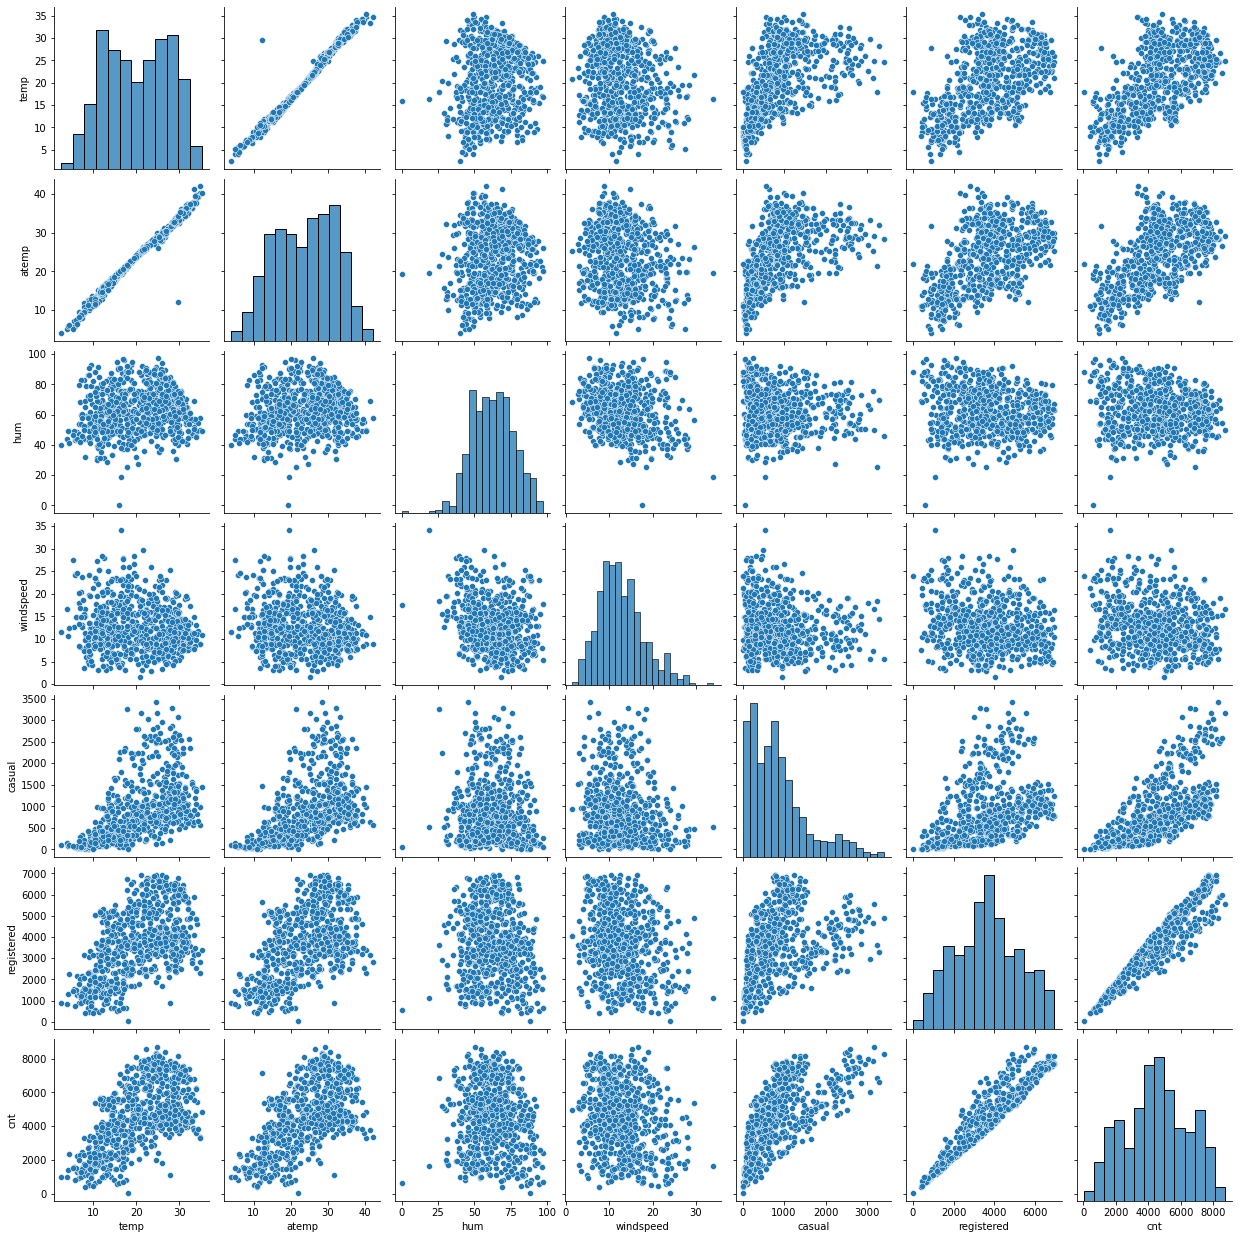

In [522]:
sns.pairplot(data=bikedata,vars=['temp','atemp','hum','windspeed','casual','registered','cnt'])

In [523]:
bikedata.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991694,0.128554,-0.158173,0.542723,0.539443,0.627046
atemp,0.991694,1.000000,0.141526,-0.183895,0.543374,0.543683,0.630694
hum,0.128554,0.141526,1.000000,-0.248535,-0.075205,-0.089208,-0.098538
windspeed,-0.158173,-0.183895,-0.248535,1.000000,-0.168011,-0.217932,-0.235152
casual,0.542723,0.543374,-0.075205,-0.168011,1.000000,0.394137,0.672123
registered,0.539443,0.543683,-0.089208,-0.217932,0.394137,1.000000,0.945411
cnt,0.627046,0.630694,-0.098538,-0.235152,0.672123,0.945411,1.000000


* A good positive correlation can be observed between 'temp' and 'atemp' with a value of 0.991
* This indicates a dependency between temp and atemp. So in model selection we can chose any one of them but not two of them inorder to avoid multi collinearity.
* A good positive correlation of approximately 0.63  is observed between 'cnt' and 'temp','atemp' variables

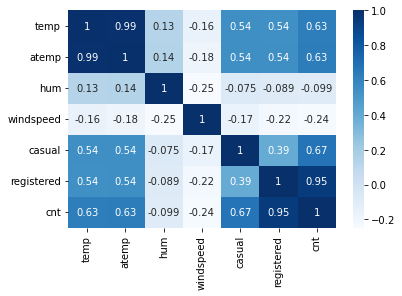

In [524]:
sns.heatmap(bikedata[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(),cmap='Blues',annot=True)
plt.show()

*  A good positive linear correlation of 0.63 can be observed between target variable 'cnt' and 'atemp' and 'temp' variable

### Analysis of Categorical Variables

#### 'cnt' vs objective variables

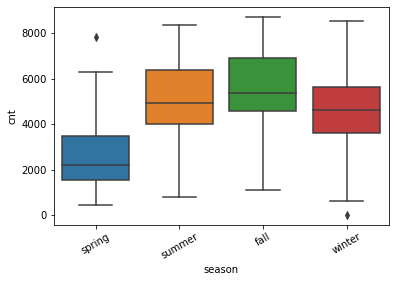

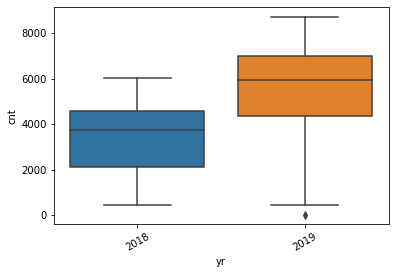

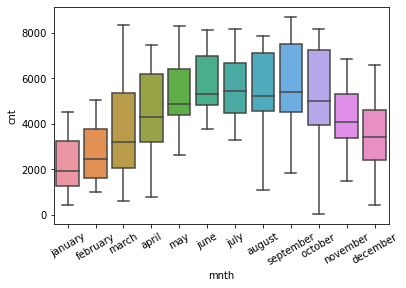

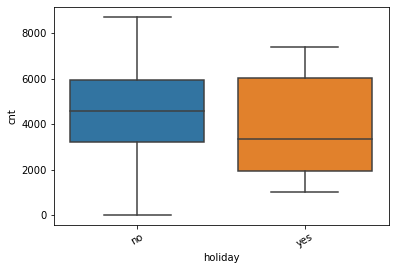

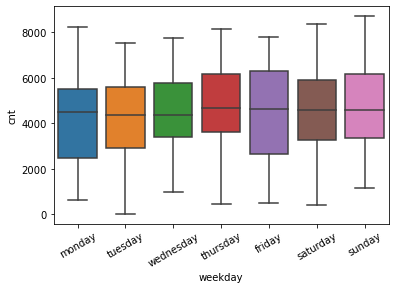

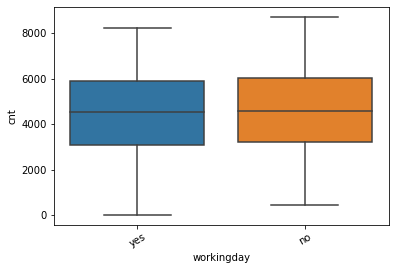

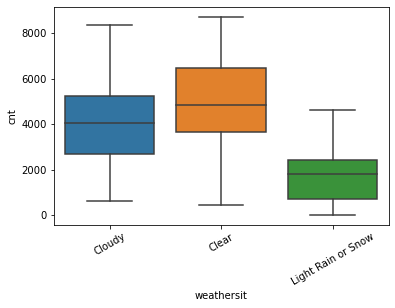

In [525]:
cols=bikedata.select_dtypes(include='object').columns
for i in cols:
    ax=sns.boxplot(data=bikedata,x=i, y='cnt')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.show()

Deductions:
- We can see that total number of users ('cnt') are more in 'Fall' season and 'Summer' season stands next to that.
- Least number of users are in 'spring' season.
- We can also see in month wise break up that 'July' and 'September' months are recorded as highest in terms of <br> average total number of registered users for the years 2018 and 2019 combined.
- But the variation seems to be the highest in months 'march', 'april', 'august', 'september', 'october'.
- The average number of total users ('cnt') stays relatively same whether it is on weekday or on weekends.
- We can also see that total number of users are highest when 'Clear' weather condition persists and least when weather is 'Light Rain or Snow'.
- Average value of Total number of users ('cnt') is more during non-holidays than during holidays.
- Average value of Total number of users remains same whether it is working day or not
- There has also been increase in the average number of total users in the year '2019' when compared to year '2018'

#### Finding Months related to Particular Season

In [527]:
bikedata[bikedata.season=='spring'][bikedata.yr=='2018'].dteday.dt.month.value_counts()

1     31
2     28
3     20
12    11
Name: dteday, dtype: int64

In [528]:
bikedata[bikedata.season=='fall'][bikedata.yr=='2018'].dteday.dt.month.value_counts()

7    31
8    31
9    22
6    10
Name: dteday, dtype: int64

In [529]:
bikedata[bikedata.season=='winter'][bikedata.yr=='2018'].dteday.dt.month.value_counts()

10    31
11    30
12    20
9      8
Name: dteday, dtype: int64

In [530]:
bikedata[bikedata.season=='summer'][bikedata.yr=='2018'].dteday.dt.month.value_counts()

5    31
4    30
6    20
3    11
Name: dteday, dtype: int64

- From above value counts, we can infer that all the months cannot be classified as particular season. <br>
- For example 'Winter' may end at the last week of december and 'Spring' begins after that.

#### 'Registered' vs Objective variables

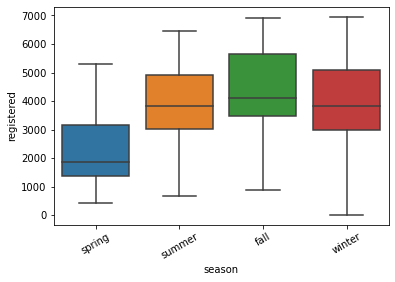

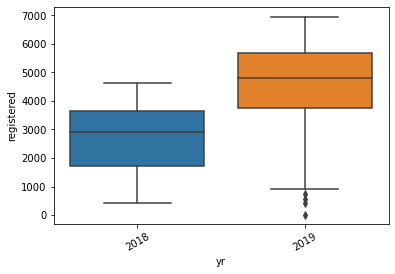

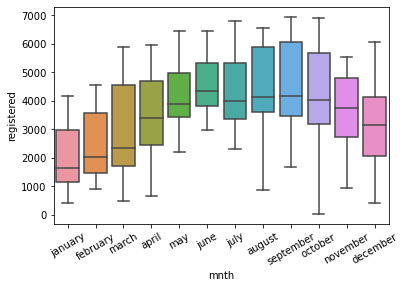

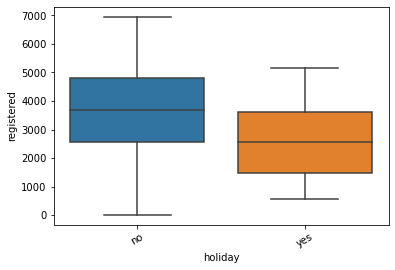

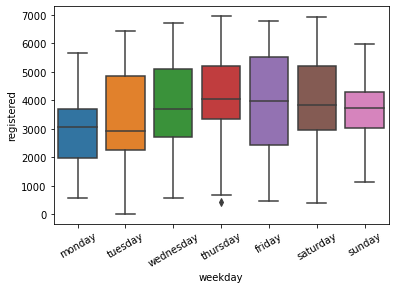

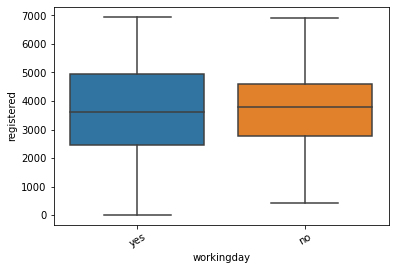

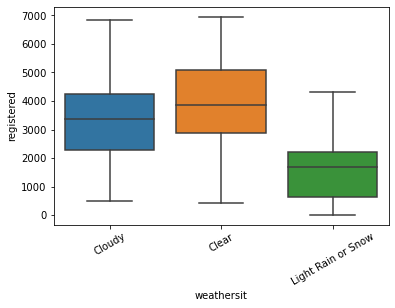

In [533]:
cols1=bikedata.select_dtypes(include='object').columns
for i in cols1:
    ax1=sns.boxplot(data=bikedata, x=i, y='registered')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=30)
    plt.show()

- Since Registered Users comprise 81 % of the total users, above analysis has been done.
- Same inferences can be drawn here as in case of 'cnt' (total number of users)
- Thus what ever inferences or model built on 'cnt' can also be applicable to 'registered' category also.

#### Finding Positive or Negative correlation between 'cnt' and meteorological conditons:

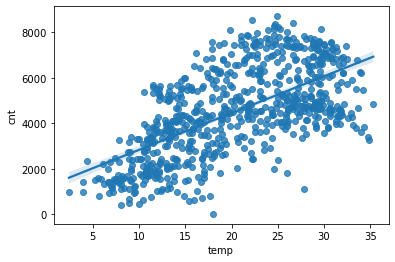

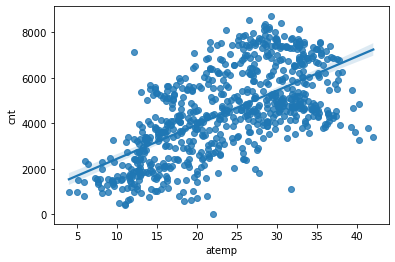

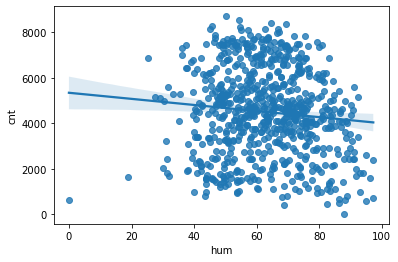

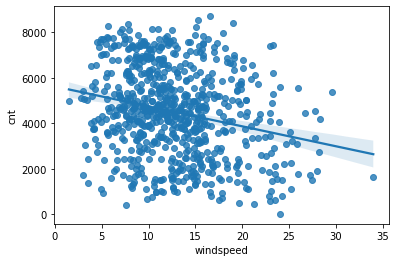

In [539]:
c3=bikedata.select_dtypes(include='float64').columns
for i in c3:
    sns.regplot(data=bikedata,y='cnt', x=i)
    plt.show()

From the above regression plots between meteorological variables and cnt, we can say that
- There is a positive correlation between 'cnt' and 'temp', 'atemp'
- There seems to be negative correlation between 'cnt' and 'windspeed', 'humidity'

### Preparing the Data for Modelling

In [721]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

#### Creating Dummy variables for objective categories:

In [722]:
col4=bikedata.select_dtypes(include='object').columns
col4[:-1]

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'], dtype='object')

If there are 'n' categories in a column, that variable can be explained by 'n-1' dummies. Thus we include drop_first= True in the creation of dummies.
There seems to be no 'Heavy Rain or snow' weather incidents occured as per the data, which makes weather situation as three categories 'Clear' , 'Cloudy', 'Light Rain or Snow'. If we drop first dummy column, it creates an impression that there are only three weather categories, which is not true.
Thus in case of creating dummies for 'weathersit' we dont drop first dummy column.

In [723]:
bikedata1=pd.get_dummies(data=bikedata, columns=col4[:-1], drop_first=True)
bikedata1=pd.get_dummies(data=bikedata1, columns=['weathersit'])
bikedata1.head()

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,...,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain or Snow
0,2018-01-01,14.11,18.18,80.58,10.75,331,654,985,1,0,...,1,0,0,0,0,0,1,0,1,0
1,2018-01-02,14.90,17.69,69.61,16.65,131,670,801,1,0,...,0,0,0,0,1,0,1,0,1,0
2,2018-01-03,8.05,9.47,43.73,16.64,120,1229,1349,1,0,...,0,0,0,0,0,1,1,1,0,0
3,2018-01-04,8.20,10.61,59.04,10.74,108,1454,1562,1,0,...,0,0,0,1,0,0,1,1,0,0
4,2018-01-05,9.31,11.46,43.70,12.52,82,1518,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [724]:
bikedata1.columns

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_august', 'mnth_december', 'mnth_february', 'mnth_january',
       'mnth_july', 'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november',
       'mnth_october', 'mnth_september', 'holiday_yes', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'workingday_yes',
       'weathersit_Clear', 'weathersit_Cloudy',
       'weathersit_Light Rain or Snow'],
      dtype='object')

#### Train - Test Split Data:

The target variable is 'cnt'. From the pie chart we can deduce that 81 % of 'cnt' users are 'registered' and exploratory analysis showed the same results for 'cnt' and 'registered'.
Thus we are removing the columns 'casual', 'registered' from bikedata1 data frame.

In [725]:
bikedata1.drop(['casual','registered'], inplace=True,axis=1)
bikedata1.columns

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'holiday_yes', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'workingday_yes', 'weathersit_Clear',
       'weathersit_Cloudy', 'weathersit_Light Rain or Snow'],
      dtype='object')

In [726]:
bikedata1.shape

(730, 32)

In [727]:
# Target variable 'y' for model
y = bikedata1.pop('cnt')
# Assigning Independent Variables to X
X = bikedata1.iloc[:,1:]
#Splitting data in to train data and test data in the ratio 70:30
Xd_train,Xd_test,yd_train,yd_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [728]:
X.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_august', 'mnth_december',
       'mnth_february', 'mnth_january', 'mnth_july', 'mnth_june', 'mnth_march',
       'mnth_may', 'mnth_november', 'mnth_october', 'mnth_september',
       'holiday_yes', 'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'workingday_yes', 'weathersit_Clear', 'weathersit_Cloudy',
       'weathersit_Light Rain or Snow'],
      dtype='object')

In [729]:
# Checking shape of Train Test data of Independent variables
print(Xd_train.shape)
print(Xd_test.shape)

(510, 30)
(220, 30)


In [730]:
# Checking shape of Train and Test data of dependent/ targent variable
print(yd_train.shape)
print(yd_test.shape)

(510,)
(220,)


#### Rescaling Variables

We use MinMaxscaler() i.e., normalization. Since the outliers in some columns doesnt affect any statistics of the respective column, we can use normalization scaling. <br>
There is no need to scale Dummy variables. <br>
Scaling is only done on continuous variables. <br>
In this case the independent variables where scaling required is 'temp', 'atemp', 'hum', 'windspeed'

In [731]:
#numerical continuous independent variables/ columns
num_cols=bikedata1.select_dtypes(include='float64').columns
num_cols

Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [732]:
scaler=MinMaxScaler()
Xd_train[num_cols]=scaler.fit_transform(Xd_train[num_cols])
Xd_train.describe()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_august,mnth_december,...,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain or Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.551349,0.527028,0.654214,0.415054,0.231373,0.258824,0.24902,0.519608,0.074510,0.074510,...,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333,0.698039,0.625490,0.345098,0.029412
std,0.227200,0.213000,0.143790,0.185754,0.422124,0.438419,0.43287,0.500106,0.262857,0.262857,...,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268,0.459559,0.484471,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354527,0.354489,0.544054,0.281869,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.575813,0.565109,0.660810,0.384673,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.745366,0.698609,0.757007,0.526355,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building The Model - I (Backward Selection)

#### Variable Selection using RFE (Recursive Feature Elimination)

In [733]:
lm=LinearRegression()
lm.fit(Xd_train, yd_train)

LinearRegression()

In [734]:
# Chossing 16 as the desired number of variables in model
rfe = RFE(lm,n_features_to_select=16)
rfe = rfe.fit(Xd_train, yd_train)
list(zip(Xd_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_august', False, 12),
 ('mnth_december', True, 1),
 ('mnth_february', False, 8),
 ('mnth_january', False, 14),
 ('mnth_july', True, 1),
 ('mnth_june', False, 9),
 ('mnth_march', True, 1),
 ('mnth_may', True, 1),
 ('mnth_november', True, 1),
 ('mnth_october', False, 3),
 ('mnth_september', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_monday', False, 4),
 ('weekday_saturday', False, 11),
 ('weekday_sunday', False, 13),
 ('weekday_thursday', False, 15),
 ('weekday_tuesday', False, 6),
 ('weekday_wednesday', False, 5),
 ('workingday_yes', False, 10),
 ('weathersit_Clear', True, 1),
 ('weathersit_Cloudy', False, 2),
 ('weathersit_Light Rain or Snow', True, 1)]

In [735]:
col=Xd_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_december', 'mnth_july', 'mnth_march', 'mnth_may',
       'mnth_november', 'mnth_september', 'holiday_yes', 'weathersit_Clear',
       'weathersit_Light Rain or Snow'],
      dtype='object')

The above columns are selected by RFE Automated Approach, We have to notice that the selected columns are arbitrary.

### Model Building

In [736]:
# Creating a VIF (Variance Inflation Factor) Dataframe function
def vif_f(col):
    bd1=Xd_train[col]
    vif=pd.DataFrame()
    vif['features'] = bd1.columns
    vif['vif']=[variance_inflation_factor(bd1.values,i) for i in range(bd1.shape[1])]
    vif['vif']=round(vif['vif'],2)
    return vif.sort_values(by='vif',ascending=False)

In [737]:
#Creating Regression model function
def reg_model(col):
    Xd_train_sm=sm.add_constant(Xd_train[col])
    lr=sm.OLS(yd_train,Xd_train_sm)
    lr_model=lr.fit()
    return lr_model.summary()

In [738]:
# Inputting the columns selected by RFE in to regression model and vif functions:
print(reg_model(col))
print(vif_f(col))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          9.99e-186
Time:                        17:11:38   Log-Likelihood:                -4113.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     493   BIC:                             8333.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

From the above results, we can infer that there is high correlation between 'temp' and 'atemp' which is evident by high VIF Values and high p-value of 'temp' and 'atemp' indicating their insignificance. <br>
We also found in exploratory data analysis that correlation between 'temp' and 'atemp' is as high as 0.99. <br>
Thus we'll drop column 'atemp' as it is derived from mixture of 'temp', 'windspeed', 'hum'



#### Model 2

In [739]:
# Dropping 'atemp' column from RFE selected columns
col1=col.drop('atemp')
print(reg_model(col1))
print(vif_f(col1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.01e-186
Time:                        17:11:40   Log-Likelihood:                -4114.5
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Dropping column 'atemp' resulted in drastic reduction of p-value of 'temp' varaiable thus increasing its significance.

#### Model 3

In [740]:
# Dropping mnth_may since it has high p-value and low vif
col2=col1.drop('mnth_may')
print(reg_model(col2))
print(vif_f(col2))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.07e-186
Time:                        17:11:42   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     495   BIC:                             8328.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Model 4

From the above vif frame, we can see that 'temp' and 'hum' has high vif (i.e., vif>10).
Lets try dropping 'hum' variable and run the model.

In [741]:
col3=col2.drop('hum')

In [742]:
print(reg_model(col3))
print(vif_f(col3))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.02e-184
Time:                        17:11:44   Log-Likelihood:                -4125.2
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- p-values of all the variables of model are significant and has p-value less than 0.05
- We can also observe that dropping 'hum' variable resulted in drastic reduction of vif for 'temp' variable.

#### Model 5

From the above vif table we can see that 'windspeed' has vif 5.03 next to the 'temp'.<br>
Since 'temp' is important, we cannot drop beside its high 'vif'<br>
Lets drop 'temp' variable to see whether it reduces vif of 'temp' column.<br>

In [743]:
col4=col3.drop('windspeed')
print(reg_model(col4))
print(vif_f(col4))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          4.70e-182
Time:                        17:11:49   Log-Likelihood:                -4133.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- Dropping 'windspeed' variable did reduce the vif of 'temp' variable as evident from above vif result.<br>
- We can also see that the selected variables in the model evident from above seem to be significant as per their p-value (<0.05) <br>
- The selected variables also have an acceptable vif (i.e., <4) which represents little to no multi collinearity among them.<br>
- The adjusted R2 (82.5) is almost equal to R2 (82.9) which ultimately translates the above model as quite good.


#### Model building using Scikit learn instead of statsmodels using above selected columns

In [744]:
lm1=lm.fit(Xd_train[col4],yd_train)
print(lm1.intercept_,lm1.coef_)

1337.845976951453 [ 3577.97619782 -1304.34769751   786.18581194  1998.65457457
  -497.0345608   -420.5074309    474.99564862  -698.59116309
   430.91273663  -583.94647205   708.84370758 -1668.60429178]


### Residual Analysis

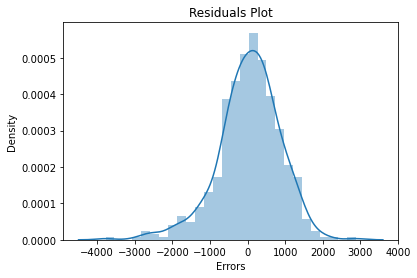

In [745]:
lr1=sm.OLS(yd_train,Xd_train[col4])
lr1_model=lr1.fit()
yd_train_pred=lr1_model.predict(Xd_train[col4])
res=yd_train-yd_train_pred
sns.distplot(res)
plt.title('Residuals Plot')
plt.xlabel('Errors')
plt.show()

From the above plot, we can see that Residuals are normally distributed with mean 0

#### Viewing Actual vs Preidcted values on Training Data Set and plotting Residuals of Training data set

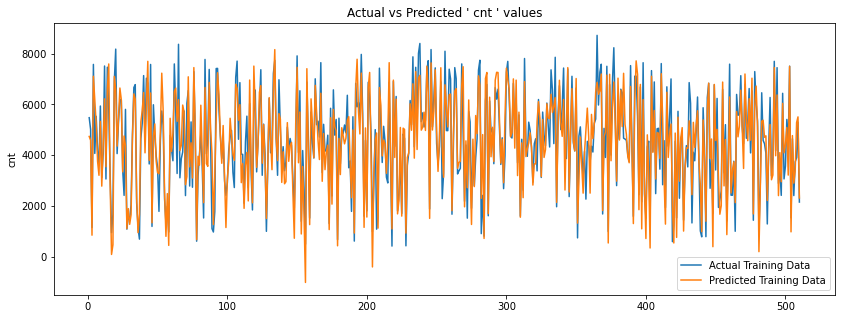

In [792]:
c=np.array(range(len(Xd_train)))+1
plt.figure(figsize=(14,5))
plt.plot(c,yd_train)
plt.plot(c,yd_train_pred)
plt.title('Actual vs Predicted \' cnt \' values')
plt.legend(['Actual Training Data','Predicted Training Data'],loc="lower right")
plt.ylabel('cnt')
plt.show()

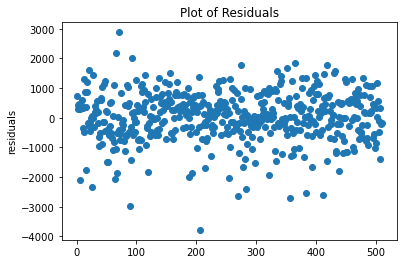

In [780]:
plt.scatter(c,yd_train-yd_train_pred)
plt.ylabel('residuals')
plt.title('Plot of Residuals')
plt.show()

There is no pattern in the residuals plot and is random justifying the linear model

### Predictions and Evaluation on the Test Set:

#### Replicating Normalization scaling on Test set:

In [746]:
Xd_test_numvars=Xd_test.select_dtypes(include='float64').columns
Xd_test[Xd_test_numvars]=scaler.transform(Xd_test[Xd_test_numvars])
Xd_test.describe()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_august,mnth_december,...,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,workingday_yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain or Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.526590,0.501058,0.629600,0.435026,0.281818,0.236364,0.231818,0.454545,0.109091,0.109091,...,0.131818,0.140909,0.163636,0.159091,0.113636,0.163636,0.672727,0.654545,0.318182,0.027273
std,0.229765,0.215607,0.152242,0.212373,0.450911,0.425817,0.422956,0.499065,0.312464,0.312464,...,0.339064,0.348721,0.370789,0.366595,0.318093,0.370789,0.470288,0.476601,0.466833,0.163248
min,0.047706,0.051195,0.193631,0.060935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324218,0.314781,0.521048,0.281495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.505773,0.494093,0.609285,0.414766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.725539,0.684432,0.734929,0.533458,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,0.970830,0.939617,1.002164,1.214953,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We should select the same columns/variables of the finalized model to the test data set also.

In [748]:
# columns/variables from our final model
col4

Index(['temp', 'season_spring', 'season_winter', 'yr_2019', 'mnth_december',
       'mnth_july', 'mnth_march', 'mnth_november', 'mnth_september',
       'holiday_yes', 'weathersit_Clear', 'weathersit_Light Rain or Snow'],
      dtype='object')

In [749]:
yd_test_pred=lm.predict(Xd_test[col4])

#### Model Evaluation using R2 score from scikit learn:

In [781]:
from sklearn.metrics import r2_score
r2_score(yd_test,yd_test_pred)

0.8085701121279152

- From the above r2 on score no test and predicted data, we can deduce that the finalised model is performing good on test data set also.
- As r2 score of model developed on training data set is 0.825 and is nearly equal to r2 score on test data set which is equal to 0.808
- We can deduce that our model is performing good.

#### Plotting Test Data and Predicted Test Data of 'cnt' variable

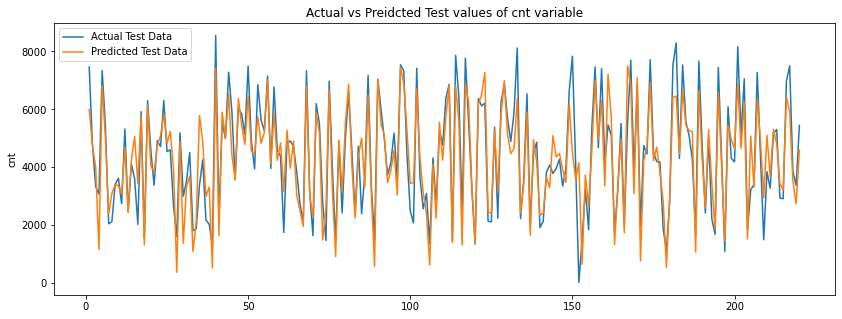

In [794]:
c1=np.array(range(len(yd_test)))+1
plt.figure(figsize=(14,5))
plt.plot(c1,yd_test)
plt.plot(c1,yd_test_pred)
plt.ylabel('cnt')
plt.title('Actual vs Preidcted Test values of cnt variable')
plt.legend(['Actual Test Data','Predicted Test Data'])
plt.show()

#### Plotting residuals of Test Data:

Text(0.5, 1.0, 'Residuals plot of Test Data')

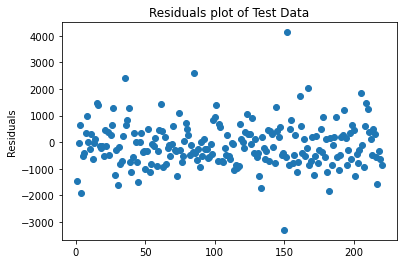

In [797]:
plt.scatter(c1, yd_test_pred-yd_test)
plt.ylabel('Residuals')
plt.title('Residuals plot of Test Data')
plt.show()

From the above plot, we can deduce that the residuals are random and do not follow any pattern.<br>
It justifies our linear model and shows it works well on test data set.

#### Interpretation of the Model

In [798]:
print(reg_model(col4))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          4.70e-182
Time:                        19:20:50   Log-Likelihood:                -4133.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [818]:
print('Minimum temperature during spring period is:',bikedata[bikedata.season=='spring'].temp.min())
print('Maximum temperature during spring period is:',bikedata[bikedata.season=='spring'].temp.max())
print('Minimum temperature during winter period is:',bikedata[bikedata.season=='winter'].temp.min())
print('Maximum temperature during winter period is:',bikedata[bikedata.season=='winter'].temp.max())

Minimum temperature during spring period is: 2.42
Maximum temperature during spring period is: 23.47
Minimum temperature during winter period is: 9.05
Maximum temperature during winter period is: 26.96


In [819]:
bikedata[bikedata.weathersit=='Light Rain or Snow'].season.value_counts()

winter    10
spring     4
fall       4
summer     3
Name: season, dtype: int64

In [820]:
bikedata[bikedata.weathersit=='Light Rain or Snow'].mnth.value_counts()

october      5
september    3
november     3
december     3
march        2
april        2
january      1
february     1
july         1
Name: mnth, dtype: int64

In [822]:
bikedata[bikedata.weathersit=='Clear'].season.value_counts()

fall      136
summer    113
spring    111
winter    103
Name: season, dtype: int64

##### Conclusions:
- 1. The positive coefficient of 'temp' suggests positive correlation between total users (cnt) and temperature.
- 2. Season 'spring' has negative coefficient. It means there is a negative correlation between cnt and spring season.<br> It might be due to lower temperatures experienced by the users, which might not have been a favorable condition for bike sharing. <br> The minimum temperature of 2.42 degree centigrade was witnessed in spring season, this is much lower than minimum value of temperature occured in winter season. This low temperature occurs during the start of spring season. <br> It is suggestible to invest on marketing at the start of 'spring' season, rather than early to increase users during 'spring' period.
- 3. Season 'Winter' has positive correlation. But this is the season, most rain or snow events occured, resulting in dip of users during this period. <br>This could be justified from negative coefficient of mnth_december and mnth_november variable which mostly falls under 'winter' period.
- 4. September month shows positive correlation with 'cnt'. It falls under 'fall' season. Favourable temperature and environment conditions might be the reasons for observing peak in users in during this month. <br> Company should invest in marketing earlier than this month to reap maximum benefits.
- 5. Holiday variable shows negative correlation. It is advisable for the company to not invest in marketing or other during or before holidays period. <br> As the average number of users during holiday period are less when compared to non-holiday period.
- 6. Clear weather situation shows positive correlation. Most clear weather situations occured during 'fall' and 'summer' periods. It is suggestible for the company to focus mainly during these seasons.

In [824]:
from sklearn.metrics import r2_score
r2_score(yd_test,yd_test_pred)

0.8085701121279152